# PCA - MNIST

En éste ejercicio vamos a aplicar PCA y K-means al digits dataset similar a MNIST, que incluye imágenes de dígitos de 8x8 píxeles. La idea es intentar recopilar información sobre la distribución de las imágenes, usando visualizaciones que permitan clarificar cómo interpretar los resultados obtenidos por PCA.

### Importamos librerías

In [44]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits

In [45]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Importamos el dataset

In [46]:
# Cargamos los datos de training
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [47]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


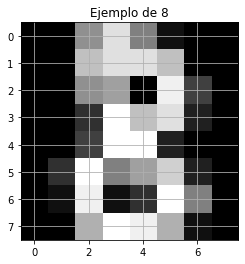

In [48]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

---

## Consignas

Siguiendo los ejemplos vistos en clase sobre los datasets de Human Activity Recognition y Fashion MNIST, realizar las siguientes consignas:

1. Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?
2. Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
3. Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].
4. Visualizar la imagen original vs. la reconstruida con los $m$ componentes del punto 1.
5. Graficar una matriz de correlación del dataset reducido.
6. Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
7. Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
8. Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
9. Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

### Item 1: Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?

In [49]:
exp_var = 0.9
pca = PCA(exp_var)
pca.fit(X)
evr = pca.explained_variance_ratio_
print(f"Ratio de varianza explicada: {np.sum(evr):.4f}")
print(f"Número de componentes necesarias: {len(evr):d}")

Ratio de varianza explicada: 0.9032
Número de componentes necesarias: 21


### Item 2: Graficar un scree plot (varianza contemplada en función del número de componentes considerados)

Text(0, 0.5, 'Explained variance ratio')

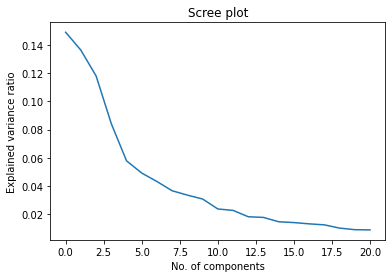

In [50]:
plt.plot(np.arange(len(evr)), evr)
plt.title('Scree plot')
plt.xlabel('No. of components')
plt.ylabel('Explained variance ratio')

### Item 3: Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].

In [51]:
pass

### Item 4: Visualizar la imagen original vs. la reconstruida con los  m  componentes del punto 1.

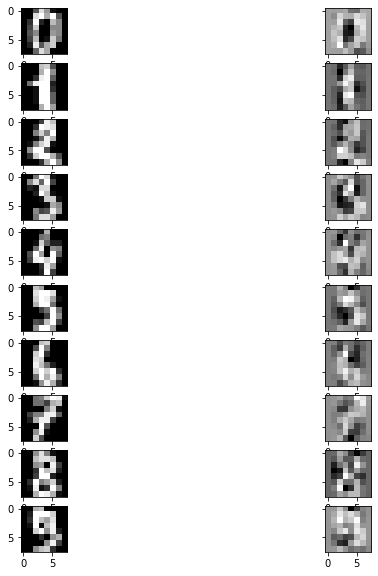

In [52]:
Xproy = pca.transform(X) # Proyeccion del dataset X sobre las componentes principales elegidas
Xrec = Xproy @ pca.components_ # DAtaset X reconstruido
n_digits = 10
_, axs = plt.subplots(n_digits, 2, sharey=True, figsize=(10, 10))
for i in range(n_digits):
  axs[i, 0].imshow(X[i, :].reshape((8, 8)), cmap='gray')
  axs[i, 1].imshow(Xrec[i, :].reshape((8, 8)), cmap='gray')


### Item 5: Graficar una matriz de correlación del dataset reducido.

In [53]:
df = pd.DataFrame(Xproy)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
1,0.00,1.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
2,0.00,0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
3,0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
4,-0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
5,-0.00,-0.00,-0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
6,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
7,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
8,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
9,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00


### Item 6: Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.

In [54]:
import plotly.express as px
digitos = [2,3]
for i,digit in enumerate(digitos):
  PCALocal = PCA(n_components=digit)
  imagenReformada = PCALocal.fit_transform(X)
  columnas = [i for i in range(0,digit)]
  mapa = pd.DataFrame(imagenReformada,columns=columnas)
  mapa['ValorEsperado'] = y.tolist()
  figure= px.scatter(mapa, x=0, y=1, color=mapa['ValorEsperado'])
  figure.show()

### Item 7: Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(Xrec)

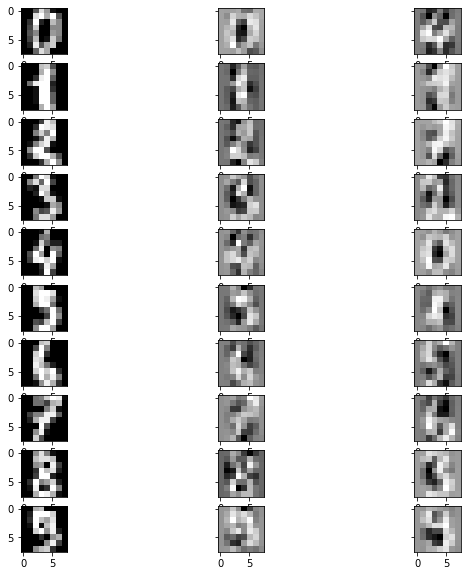

In [56]:
Xrec_kmeans = kmeans.cluster_centers_
_, axs = plt.subplots(n_digits, 3, sharey=True, figsize=(10, 10))
for i in range(n_digits):
  axs[i, 0].imshow(X[i, :].reshape((8, 8)), cmap='gray') # Imagen original
  axs[i, 1].imshow(Xrec[i, :].reshape((8, 8)), cmap='gray') # Imagen con PCA
  axs[i, 2].imshow(Xrec_kmeans[i, :].reshape((8, 8)), cmap='gray') # Imagen con K-means

Los resultados obtenidos con K-means, aunque se encuentran desordenados, son aceptables en relación a los obtenidos con PCA. El método aparenta ser válido para clasificar los dígitos. Sin embargo, al especificar a priori que se deben clasificar los resultados en 10 clases, estamos favoreciendo artificialmente la agrupación en los dígitos considerados. 

### Item 8: Realizar un gráfico de inercia para obtener el número óptimo de clusters  k .

In [57]:
inertia_list = []
lower = 1
upper = 30
for num_clusters in range(lower, upper):
    kmeans_model = KMeans(n_clusters=num_clusters, init="random")
    kmeans_model.fit(Xrec)
    inertia_list.append(kmeans_model.inertia_)


Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

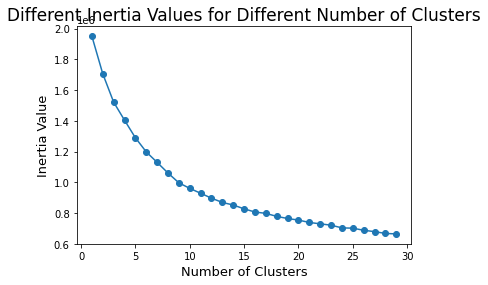

In [58]:
plt.plot(range(lower, upper),inertia_list)
plt.scatter(range(lower, upper),inertia_list)
#plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

El gráfico de inercia es utilizado para encontrar la cantidad de clústers óptimos con los cuales establecer la clasificación deseada, mediante la identificación de un quiebre apreciable en la gráfica conocido como "codo". En este caso no se aprecia con claridad que la gráfica adopte una forma de tal caracterísitica. Esto indica que el número óptimo de clústers no podría establecerse con seguridad de antemano utilzando K-means.

### Item 9: Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

In [59]:
pass